In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# Load dataset
url = "./WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

## Exploratory Data Analysis (EDA)

1. **How big is the data?**

In [8]:
print(df.shape)

(7043, 20)


This dataset consists of 7,043 rows and 21 columns.

2. **How does the data look?**

In [9]:
display(df.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


3. **What are the data types?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


4. **Are there any missing values?**

In [24]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

5. **How does the data look mathematically?**

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


6. **Are there any duplicate values?**

In [20]:
df.duplicated().sum()

0

7. **What is the correlation between columns?**

In [21]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


## Clean data

Drop customerID column because customerID is unique for each customer and doesn't add value to the analysis.

In [22]:
df.drop(columns=["customerID"], inplace=True)

Convert TotalCharges to Numeric: TotalCharges column is stored as an object, likely due to some non-numeric values (e.g. blanks)

In [ ]:
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [30]:
# check for missing values:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Handle missing values by filling with the MEDIAN or DROPPING ROWS.

In [35]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)
print(df["TotalCharges"].isnull().sum())

0


Visualize these numerical columns.

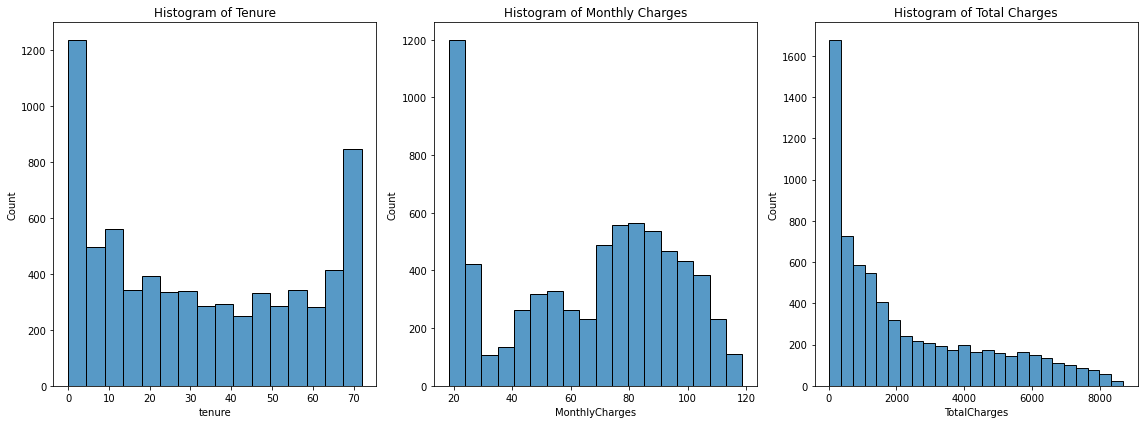

In [39]:
# Create a 1x3 grid of subplots (3 columns, 1 row)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot for the first categorical column 'day'
sns.histplot(df["tenure"], ax=axes[0])
axes[0].set_title("Histogram of Tenure")

# Plot for the second categorical column 'sex'
sns.histplot(df["MonthlyCharges"], ax=axes[1])
axes[1].set_title("Histogram of Monthly Charges")

# Plot for the third categorical column 'smoker'
sns.histplot(df["TotalCharges"], ax=axes[2])
axes[2].set_title("Histogram of Total Charges")

# Adjust layout
plt.tight_layout()
plt.show()

Working with Categorical columns

In [40]:
display(df[['gender', 'Partner', 'Churn']].head(5))

,gender,Partner,Churn
0,Female,Yes,No
1,Male,No,No
2,Male,No,Yes
3,Male,No,No
4,Female,No,Yes


In [41]:
# Extract categorical columns (dtype 'object' or 'category')
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


Transform categorical variables (e.g. gender, Partner, Churn) into numerical format using one-hot encoding or label encoding

In [42]:
df[categorical_columns].head(5)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [58]:
for col in categorical_columns:
    print(df[col].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [ ]:
df_copy = df.copy()

In [60]:
# Binary encoding for binary columns:
df["gender"] = df["gender"].map({'Female': 1, 'Male': 0})
df["Partner"] = df["Partner"].map({'Yes': 1, 'No': 0})
df['Dependents'] = df["Dependents"].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df["PhoneService"].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df["MultipleLines"].map({'Yes': 1, 'No': 0})
df['OnlineSecurity'] = df["OnlineSecurity"].map({'Yes': 1, 'No': 0})
df["OnlineBackup"] = df["OnlineBackup"].map({'Yes': 1, 'No': 0})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [63]:
for col in categorical_columns:
    print(f"{col}: \n{df[col].unique()}")

gender: 
[1 0]
Partner: 
[1 0]
Dependents: 
[0 1]
PhoneService: 
[0 1]
MultipleLines: 
[0 1]
InternetService: 
['DSL' 'Fiber optic' 'No']
OnlineSecurity: 
[0 1]
OnlineBackup: 
[0 1]
DeviceProtection: 
[0 1]
TechSupport: 
[0 1]
StreamingTV: 
[0 1]
StreamingMovies: 
[0 1]
Contract: 
['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 
[1 0]
PaymentMethod: 
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: 
[0 1]


In [76]:
# One-hot encoding for multi-category columns:
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"])

In [81]:
# Update the list of categorical columns:
categorical_columns = [item for item in categorical_columns if item not in ["InternetService", "Contract", "PaymentMethod"]]

In [84]:
display(df.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


> **Overview of Target Variable Check the distribution of Churn to understand class balance**

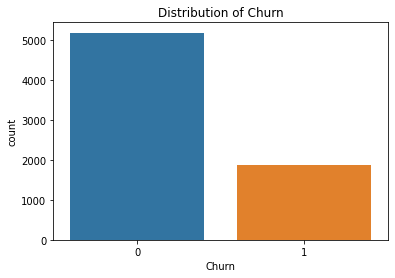

In [86]:
# Distribution of Churn:
sns.countplot(data=df, x = "Churn")
plt.title("Distribution of Churn")
plt.show()

In [68]:
# Percentage of customers who churned:
churn_rate = df["Churn"].value_counts(normalize=True)*100
print("Churn Rate: \n", churn_rate)

Churn Rate: 
 0    73.463013
1    26.536987
Name: Churn, dtype: float64


> Numerical Features Analysis: Examine numerical columns (tenure, MonthlyCharges, Total Charges) for trends

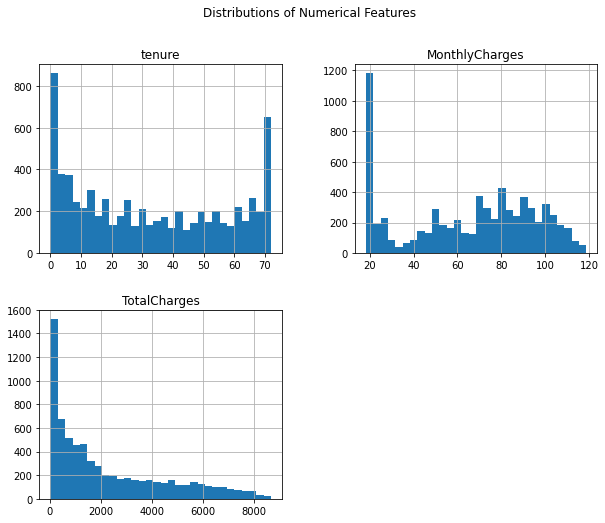

In [69]:
# Distribution of Numerical features:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins = 30, figsize=(10,8))
plt.suptitle("Distributions of Numerical Features")
plt.show()

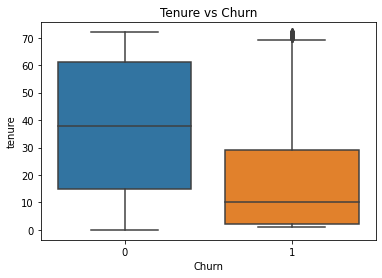

In [87]:
# Relationship between tenure and churn:
sns.boxplot(data=df, x = "Churn", y = "tenure")
plt.title("Tenure vs Churn")
plt.show()

> **Categorical Features Analysis: Analyzing relationships between categorical variables and churn**

In [88]:
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [ ]:
sns.countplot(data = df, x = 'Contract_Month-to-month', hue = "Churn")
plt.title("Contract Type vs Churn")
plt.show()

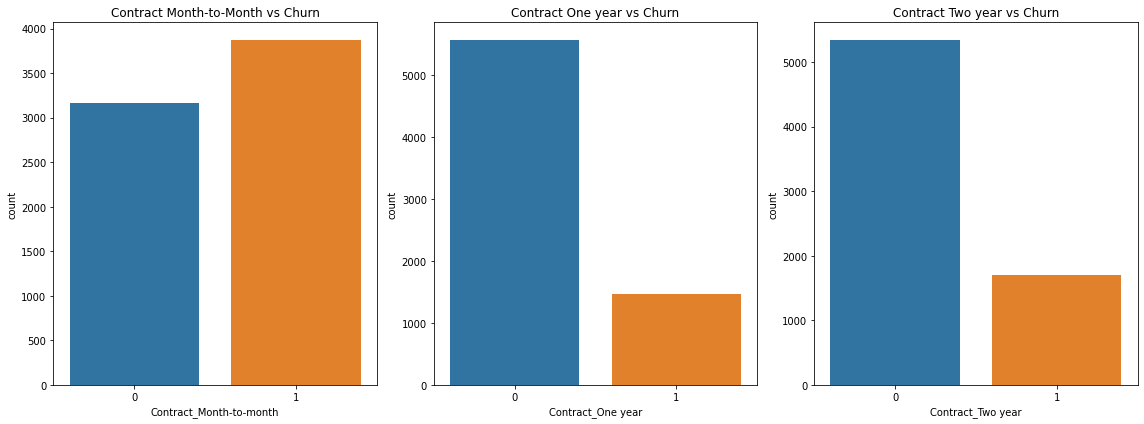

In [136]:
# Contract type vs Churn
# Since "Contract" was one-hot encoded, use the new column names
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot for the first categorical column 'day'
sns.countplot(data = df, x = "Contract_Month-to-month", ax=axes[0])
axes[0].set_title("Contract Month-to-Month vs Churn")

# Plot for the second categorical column 'sex'
sns.countplot(data = df, x = "Contract_One year", ax=axes[1])
axes[1].set_title("Contract One year vs Churn")

# Plot for the third categorical column 'smoker'
sns.countplot(data = df, x = "Contract_Two year", ax=axes[2])
axes[2].set_title("Contract Two year vs Churn")

# Adjust layout
plt.tight_layout()
plt.show()

There is a high chance of leaving when customer with a month-to-month contract.

### Correlation Heatmap Visualize correlations between numerical features

In [92]:
# select only numerical features for correlation
numerical_features = df.select_dtypes(include=np.number).columns
df.loc[0:3,numerical_features]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


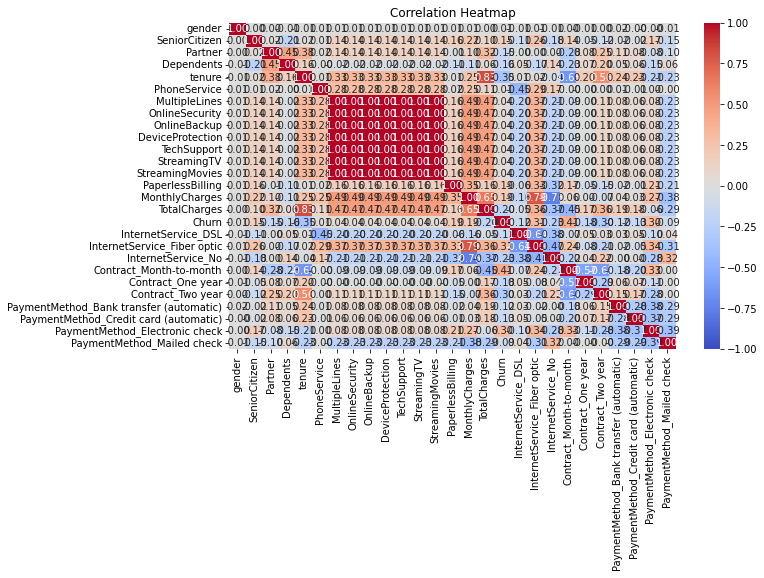

In [93]:
corr_matrix = df[numerical_features].corr()

# Plot heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt = ".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Models

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

X = df.drop(columns = ['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)
print(X_train.shape)
print(X_test.shape)

(5634, 26)
(1409, 26)


### 1. Logistic Regression Model

> **Logistic Regression is a simple and interpretable baseline for binary classification.**

In [95]:
# Assuming 'object_columns' are the columns with 'No' values
object_columns = X_train.select_dtypes(include=['object']).columns
print(f"Object columns: {object_columns}")
X_train[object_columns].head(5)

Object columns: Index([], dtype='object')


""
3738
3151
4860
3867
3810


In [96]:
# Ensure all columns are numeric, converting other object types to numeric if needed:
for col in object_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors = 'coerce').fillna(0)
    X_test[col] = pd.to_numeric(X_test[col], errors = 'coerce').fillna(0)

In [97]:
display(X_train.head(5))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3738,0,0,0,0,35,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3151,0,0,1,1,15,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4860,0,0,1,1,13,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3867,1,0,1,0,26,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3810,0,0,1,1,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Initialize and train model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict_proba(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1] # Probabilities for class 1 (Positive class)

In [102]:
y_pred

array([[0.92229072, 0.07770928],
       [0.30220938, 0.69779062],
       [0.93603015, 0.06396985],
       ...,
       [0.81482978, 0.18517022],
       [0.99530165, 0.00469835],
       [0.98507661, 0.01492339]])

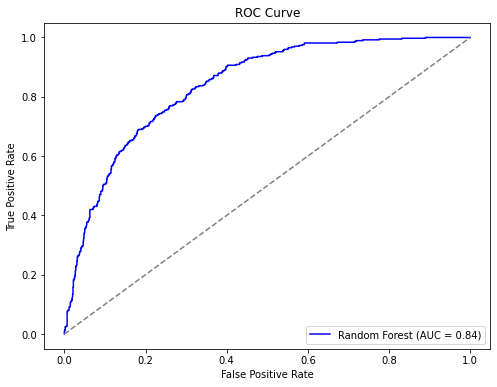

In [104]:
# Calculate ROC curve:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color = "blue", label = 'Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba)))
plt.plot([0,1],[0,1], color='gray', linestyle='--') # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [105]:
# Find the best threshold based on the maximum Youden's Index (TPR - FPR):
youden_index = tpr - fpr
best_threshold_index = np.argmax(youden_index)
best_threshold = thresholds[best_threshold_index]

print(f"Best Threshold: {best_threshold:.4f}")


Best Threshold: 0.2335


In [108]:
# Use the best threshold to make predictions:
y_pred_best = (y_pred_proba >= best_threshold).astype(int)

In [112]:
y_test

437     0
2280    0
2235    0
4460    0
3761    0
       ..
5143    0
4439    0
3857    0
4758    0
5613    0
Name: Churn, Length: 1409, dtype: int64

In [119]:
# Evaluate the model:
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_pred_best)*100:.2f}%", )
print("Classification Report ")
print(classification_report(y_test, y_pred_best))

Accuracy: 72.25%
Random Forest ROC-AUC Score: 75.56%
Classification Report 
              precision    recall  f1-score   support

           0       0.92      0.69      0.78      1035
           1       0.49      0.83      0.61       374

    accuracy                           0.72      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.80      0.72      0.74      1409



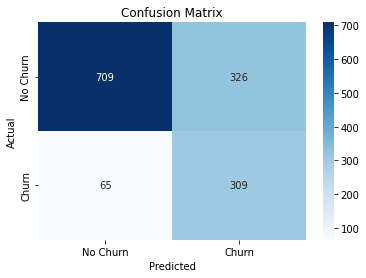

In [120]:
# Plot confusion matrix
cf = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 2. Random Forest Classifier

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predictions and probabilities
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

In [122]:
# Print evaluation metrics
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest Confusion Matrix:
 [[920 115]
 [185 189]]
Random Forest ROC-AUC Score: 0.8190188328295746


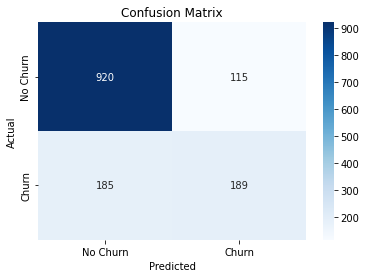

In [123]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

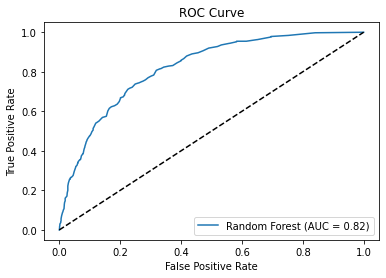

In [124]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_proba_rf)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 3. XGBoost Classifier

In [125]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions and probabilities
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

In [126]:
# Print evaluation metrics
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

XGBoost Confusion Matrix:
 [[919 116]
 [176 198]]
XGBoost ROC-AUC Score: 0.8234971195329251


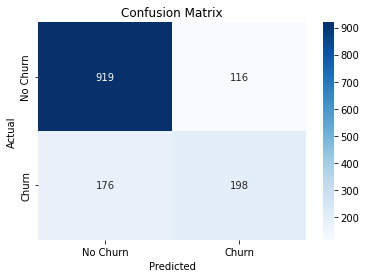

In [127]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()